<figure>
<img src="space_start.png" alt="ip_image" style="width: 800px;"/>
</figure>

<center>
<h3><font color='black'>Space X  Falcon 9 take off and landing</font></h3>
</center>

<div style="float: left; margin-left: 10em;">
    <img class="Space X Falcon 9" src="https://upload.wikimedia.org/wikipedia/commons/d/df/Iridium-1_Launch_%2832312419215%29.jpg" width="300" alt="Space X Falcon 9">
    <p><center>SpaceX Falcon9 take off</center></p>
</div>
    
<div style="float: right; margin-right: 10em;">
    <img class="Space X Falcon 9 First Stage Landing" src="https://media2.giphy.com/media/IgdZpQHUR7sbe/giphy.gif"  width="300" alt="Space X Falcon 9">
    <p><center>First stage landing</center></p>
</div>


<center>
<h3><font color='black'>Space X rocket models</font></h3>
</center>

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module\_1\_L2/images/Falcon9\_rocket_family.svg)

<center>
<h3><font color='black'>Comparison between the SpaceX Falcon9 and other rockets</font></h3>
</center>

<figure>
<img src="comparation.png" alt="ip_image" style="width: 800px;"/>
</figure>

<h2><font color='blue'>Outline</font></h2>

#### - Introduction
#### - Executive Summary
#### - Introduction
#### - Methodology
#### - Results
#### - Conclusion

<h2><font color='blue'>Introduction</font></h2>

#### Project background and context
*  We predicted if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website, with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore, if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. 
<br>

##### Problems you want to find answers
* What influences if the rocket will land successfully?
* The effect each relationship with certain rocket variables will impact in determining the success rate of a successful landing.
* What conditions does SpaceX have to achieve to get the best results and ensure the best rocket success landing rate.

#### The competitive prices of SpaceX rockets (-63% compared to competitors) are due to the reuse of the tmost expensive component of the rocket, the first stage


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


<div style="float: left; margin-left: 1em;">
    <img class="Space X Falcon 9" src="https://media0.giphy.com/media/3o7aDfk8UmiioXaeoo/giphy.gif?cid=ecf05e47s8vqpyibz34q54kbc2ecc22xuy864cro6mxkabkz&rid=giphy.gif&ct=g" width="450" alt="Space X Falcon 9">
    <p><center>Successful landings</center></p>
</div>

<div style="float: right; margin-right: 1em;">
    <img class="Space X Falcon 9 First Stage Landing" src="https://i.giphy.com/media/xT39CRup15MdJgjLy0/giphy.webp"  width="450" alt="Space X Falcon 9">
    <p><center>Most unsuccessful landings are planned.<br>
        Space X; performs a controlled landing in the oceans.</center></p>
</div>

<h4><font color='blue'>Falcon 9 stages</font></h4>

<figure>
<img src="Falcon9 stages.png" alt="planimetria_1" style="width: 900px;"/>
    <p><center>Falcon 9 stages</center></p>
</figure>

We will adopt classification approach to create a supervised Machine Learning model that will learn how to interpret how various characteristics concerning the rocket and the launch site affect the recovery of the first stage. We could predict if the first stage will be recovered and therefore the cost of the launch.This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

<h4><font color='blue'>Executive Summary</font></h4>

#### Summary of methodologies
* Data collection
* Data wrangling
* EDA with data visualization
* Building an interactive map with Folium
* Building a Dashboard with Plotly Dash
* Predictive analysis (Classification)

#### Summary of all results
* Exploratory data analysis results
* Interactive analytics demo in screenshots
* Predictive analysis results

<figure>
<img src="pipeline.png" alt="ip_image" style="width: 800px;"/>
</figure>

<h4><font color='blue'>Data collection</font></h4>

#### The following datasets was collected by:
* We worked with SpaceX launch data that is gathered from the SpaceX REST API.
* This API will give us data about launches, including information about the rocket used,payload delivered, launch specifications, landing specifications, and landing outcome.
* Our goal is to use this data to predict whether SpaceX will attempt to land a rocket or not.
* The SpaceX REST API endpoints, or URL, starts with api.spacexdata.com/v4/.<br>

(Another popular data source for obtaining Falcon 9 Launch data is web scraping Wikipedia using BeautifulSoup)

<figure>
<img src="Data_collection.png" alt="planimetria_1" style="width: 900px;"/>
    <p><center>Data collection process</center></p>
</figure>

#### Import Libraries

In [1]:
import numpy as np
from math import sin, cos, sqrt, atan2, radians
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import requests
import datetime
#!pip3 install folium
#!pip3 install wget
import folium
import wget
from folium.plugins import MarkerCluster, MousePosition
from folium.features import DivIcon

import warnings
warnings.filterwarnings('ignore')

class bcolors:
    PERSONAL = '\033[94m'+'\033[1m'
    ENDC = '\033[0m'

<h4><font color='blue'>Functions definition</font></h4>

In [2]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])
        
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])
        
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])
        
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'


def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance
    
# To create the confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

#### Load data - let's start requesting rocket launch data from SpaceX API

In [3]:
# Decoding the response content as a Json file
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = pd.json_normalize(response.json())

In [4]:
data.head(2)

,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN


#### Dataset pre-processing
Now use the API again to get information about the launches using the IDs given for each launch. Specifically we will be using columns rocket, payloads, launchpad, and cores

In [5]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]
data.head(2)

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight':...",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight':...",2,2007-03-21T01:10:00.000Z,2007-03-21


*   From the <code>rocket</code> we would like to learn the booster name

*   From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to

*   From the <code>launchpad</code> we would like to know the name of the launch site being used, the longitude, and the latitude.

*   From <code>cores</code> we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

The data from these requests will be stored in lists and will be used to create a new dataframe.

In [6]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

Let's apply the functions to populate the lists and than we will create a dictionary

In [7]:
# Call function getBoosterVersion
getBoosterVersion(data)

# Call function getLaunchSite
getLaunchSite(data)

# Call function getPayloadData
getPayloadData(data)

# Call function getCoreData
getCoreData(data)

launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

In [8]:
# Dataframe from launch_dict
df = pd.DataFrame.from_dict(launch_dict)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [9]:
# Dataframe with only Falcon 9 launches
data_falcon9 = df[df.BoosterVersion=='Falcon 9']
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9.reset_index(inplace=True, drop=True)
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


In [10]:
# There are null values to fill
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [11]:
# filling of the 'PayloadMass' column null values with the average value
# filling of the 'LandingPad' column null values with the most frequent value
pl_mean = data_falcon9.PayloadMass.mean()
lp_mean = data_falcon9.LandingPad.mode()

data_falcon9['PayloadMass'] = data_falcon9['PayloadMass'].replace(np.nan,pl_mean)
data_falcon9['LandingPad'] = data_falcon9['LandingPad'].replace(np.nan,pl_mean)
data_falcon9.isnull().sum()

FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       0
Orbit             0
LaunchSite        0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad        0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
dtype: int64

#### The dataset is ready

In [12]:
df = data_falcon9
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,6123.547647,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B1004,-80.577366,28.561857


In [13]:
df.shape

(90, 17)

<h4><font color='blue'>Data Wrangling</font></h4>

* In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; for example, True Oceanmeans the mission outcome was successfully landed to a specific region of the ocean while False Oceanmeans the mission outcome was unsuccessfully landed to a specific region of the ocean.True RTLSmeans the mission outcome was successfully landed to a ground padFalse RTLSmeans the mission outcome was unsuccessfully landed to a ground pad. True ASDSmeans the mission outcome was successfully landed on a drone shipFalse ASDSmeans the mission outcome was unsuccessfully landed on a drone ship.
* We mainly convert those outcomes into Training Labels with1means the booster successfully landed0means it was unsuccessful.


#### Now we import another dataset to obtain the launch sites GPS coordinate

In [14]:
# Downloading of the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

100% [................................................................................] 8966 / 8966

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610746


### NASA Johnson Space Center and Launch Sites

#####           CCAFS LC-40 / CCAFS LC-40   -   Cape Canaveral Space Force Station 
#####            KSC LC-39A   -   Kennedy Space Center
#####           VAFB SLC 4E   -   Vandenberg Air Force Base

In [15]:
# NASA Johnson Space Center coordinate
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

In [16]:
# red circle at NASA center and at launch sites
site_map = folium.Map(location=nasa_coordinate, zoom_start=4)

# add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))

marker = folium.map.Marker(
    nasa_coordinate,
    # icon as a text label NASA JSC
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

for i in range(len(launch_sites_df)):
    site = launch_sites_df.iloc[i,0]
    coordinate = [launch_sites_df.iloc[i,1], launch_sites_df.iloc[i,2]]
    
    # red circle at launch site coordinate with a popup label showing its name
    circle = folium.Circle(coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup(site))
    
    # red circle at NASA Johnson Space Center's coordinate with a icon showing its name
    marker = folium.map.Marker(
        coordinate,
        # Create an icon as a text label
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % site,
            )
        )
    site_map.add_child(circle)
    site_map.add_child(marker)
site_map

<h4><font color='green'>INSIGHN >> All launch sites are very close to the sea, and are fairly close to the equator. In fact the launches of space carriers exploit the sling effect due to the rotational motion of the earth which is precisely greater near the equator</font></h4>

In [17]:
# Launches for each site
df.LaunchSite.value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [18]:
# coordinates
CCAFS_LC40_coordinate = [28.562302, -80.577356]
CCAFS_LC40_lat = 28.562302
CCAFS_LC40_long = -80.577356

coast_lat = 28.56342
coast_long = -80.56794
from_coast_coordinates = [CCAFS_LC40_coordinate, [coast_lat, coast_long]]

railway_lat = 28.57177
railway_long = -80.58515
from_railway_coordinates = [CCAFS_LC40_coordinate, [railway_lat, railway_long]]

highway_lat = 28.49969
highway_long = -80.57523
from_highway_coordinates = [CCAFS_LC40_coordinate, [highway_lat, highway_long]]

Melbourne_lat = 28.09912
Melbourne_long = -80.64377
from_Melbourne_coordinates = [CCAFS_LC40_coordinate, [Melbourne_lat, Melbourne_long]]

coast_distance = calculate_distance(CCAFS_LC40_lat, CCAFS_LC40_long, coast_lat, coast_long)
railway_distance = calculate_distance(CCAFS_LC40_lat, CCAFS_LC40_long, railway_lat, railway_long)
highway_distance = calculate_distance(CCAFS_LC40_lat, CCAFS_LC40_long, highway_lat, highway_long)
Melbourne_distance = calculate_distance(CCAFS_LC40_lat, CCAFS_LC40_long, Melbourne_lat, Melbourne_long)

In [19]:
site_map = folium.Map(location=CCAFS_LC40_coordinate, zoom_start=14)
marker_cluster = MarkerCluster()
site_map.add_child(marker_cluster)

for i in range(len(launch_sites_df)):
    site = launch_sites_df.iloc[i,0]
    coordinate = [launch_sites_df.iloc[i,1], launch_sites_df.iloc[i,2]]
    
    # Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
    circle = folium.Circle(coordinate, radius=300, color='#d35400', fill=True).add_child(folium.Popup(site))
    # Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name

    site_map.add_child(circle)
    
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)
site_map.add_child(mouse_position)

distance_marker = folium.Marker(
    [coast_lat, coast_long],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(coast_distance),
        )
    )
site_map.add_child(distance_marker)

distance_marker = folium.Marker(
    [railway_lat, railway_long],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(railway_distance),
        )
    )
site_map.add_child(distance_marker)

distance_marker = folium.Marker(
    [highway_lat, highway_long],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(highway_distance),
        )
    )
site_map.add_child(distance_marker)

distance_marker = folium.Marker(
    [Melbourne_lat, Melbourne_long],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(Melbourne_distance),
        )
    )
site_map.add_child(distance_marker)

lines=folium.PolyLine(locations=from_coast_coordinates, weight=1)
site_map.add_child(lines)

lines=folium.PolyLine(locations=from_railway_coordinates, weight=1)
site_map.add_child(lines)

lines=folium.PolyLine(locations=from_highway_coordinates, weight=1)
site_map.add_child(lines)

lines=folium.PolyLine(locations=from_Melbourne_coordinates, weight=1)
site_map.add_child(lines)

site_map

In [20]:
print(f'The distance from "CCAFS LC-40 - Cape Canaveral Space Force Station" to the coast:\n\
{coast_distance:.3f} Km\n\n')

print(f'The distance from "CCAFS LC-40 - Cape Canaveral Space Force Station" to the railway:\n\
{railway_distance:.3f} Km\n\n')

print(f'The distance from "CCAFS LC-40 - Cape Canaveral Space Force Station" to the highway:\n\
{highway_distance:.3f} Km\n\n')

print(f'The distance from "CCAFS LC-40 - Cape Canaveral Space Force Station" to Melbourne:\n\
{Melbourne_distance:.3f} Km')

The distance from "CCAFS LC-40 - Cape Canaveral Space Force Station" to the coast:
0.928 Km


The distance from "CCAFS LC-40 - Cape Canaveral Space Force Station" to the railway:
1.300 Km


The distance from "CCAFS LC-40 - Cape Canaveral Space Force Station" to the highway:
6.967 Km


The distance from "CCAFS LC-40 - Cape Canaveral Space Force Station" to Melbourne:
51.928 Km


<h4><font color='green'>INSIGHN >><br>
Are launch sites in close proximity to coastline? Yes<br>
Are launch sites in close proximity to railways? No<br>
Are launch sites in close proximity to highways? No<br>
Are launch sites in close proximity to cities? No
</font></h4>

#### Orbits - Each launch aims to an dedicated orbit, and here are some common orbit types:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/Orbits.png)

*   <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),\ or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.\ Most of the manmade objects in outer space are in LEO

*   <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation

*   <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website

*   <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time

*   <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth

*   <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth
*   <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)

*   <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours

*   <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) 

*   <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation

*   <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth

In [21]:
# Launche numbers for each orbit
df.Orbit.value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
SO        1
HEO       1
ES-L1     1
GEO       1
Name: Orbit, dtype: int64

<h4><font color='green'>INSIGHN >> The orbits on which more launches are made are: "GTO", "ISS", "VLEO"</font></h4>

In [22]:
# success and unsuccess first stage landing and on which launch site
landing_outcomes = df.Outcome.value_counts()
landing_outcomes

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
None ASDS       2
False Ocean     2
False RTLS      1
Name: Outcome, dtype: int64

In [23]:
# unsuccess landings
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [24]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise
landing_class = []
for i in range(df['Outcome'].shape[0]):
    if df['Outcome'].iloc[i] in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)
        
landing_class[0:8]

[0, 0, 0, 0, 0, 0, 1, 1]

In [25]:
# our label/y is df['Class']
df['Class']=landing_class
y = df[['Class']]
y[0:8]

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [26]:
df.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0005,-80.577366,28.561857,0


In [27]:
# success rate for all lounches
succ_rate = df["Class"].mean()
succ_rate

0.6666666666666666

<h4><font color='green'>INSIGHN >> The first stage manages to land in 66% of the launches</font></h4>

In [28]:
df['Orbit'].value_counts().keys()

Index(['GTO', 'ISS', 'VLEO', 'PO', 'LEO', 'SSO', 'MEO', 'SO', 'HEO', 'ES-L1',
       'GEO'],
      dtype='object')

In [29]:
succ_rate = df.groupby(['Orbit']).mean().Class
succ_rate

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

In [30]:
succ_rate.values

array([1.        , 1.        , 0.51851852, 1.        , 0.61904762,
       0.71428571, 0.66666667, 0.66666667, 0.        , 1.        ,
       0.85714286])

<h4><font color='blue'>EDA with data visualization</font></h4>

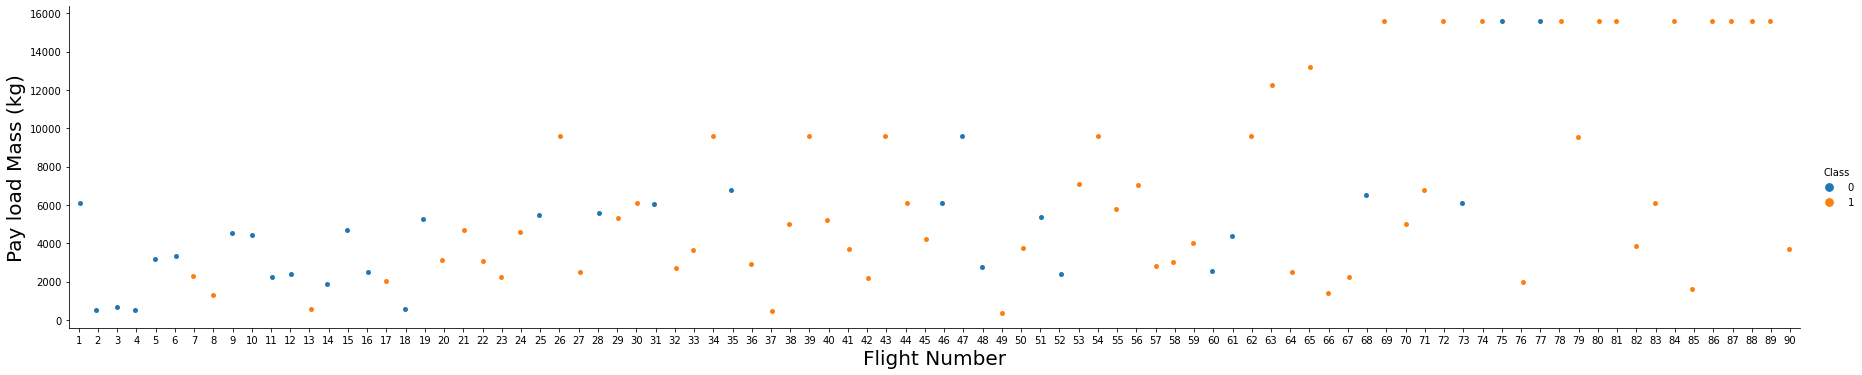

In [31]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Scatter plots showhow much one variable is affected by another. The relationship between two variables is called their correlation .Scatter plots usually consist of a large body of data.

<h4><font color='green'>INSIGHN >> With increasing launches and experience they can successfully carry heavier and heavier loads</font></h4>

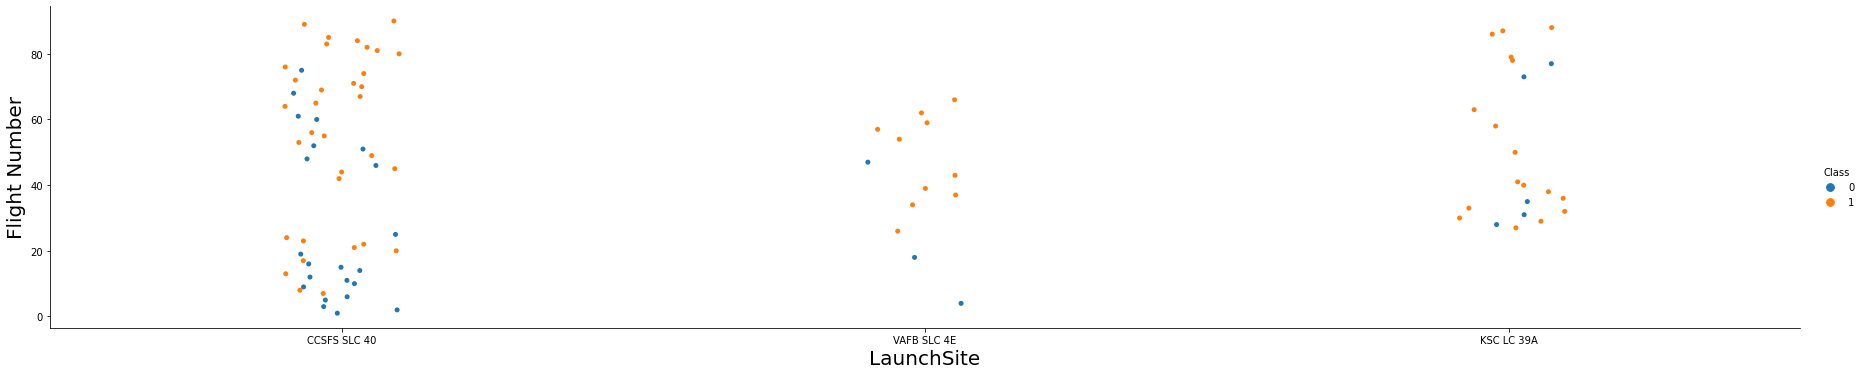

In [32]:
sns.catplot(x="LaunchSite", y="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("Flight Number",fontsize=20)
plt.show()

<h4><font color='green'>INSIGHN >> The more amount of flights at a launch site the greater the success rate at a launch site.</font></h4>

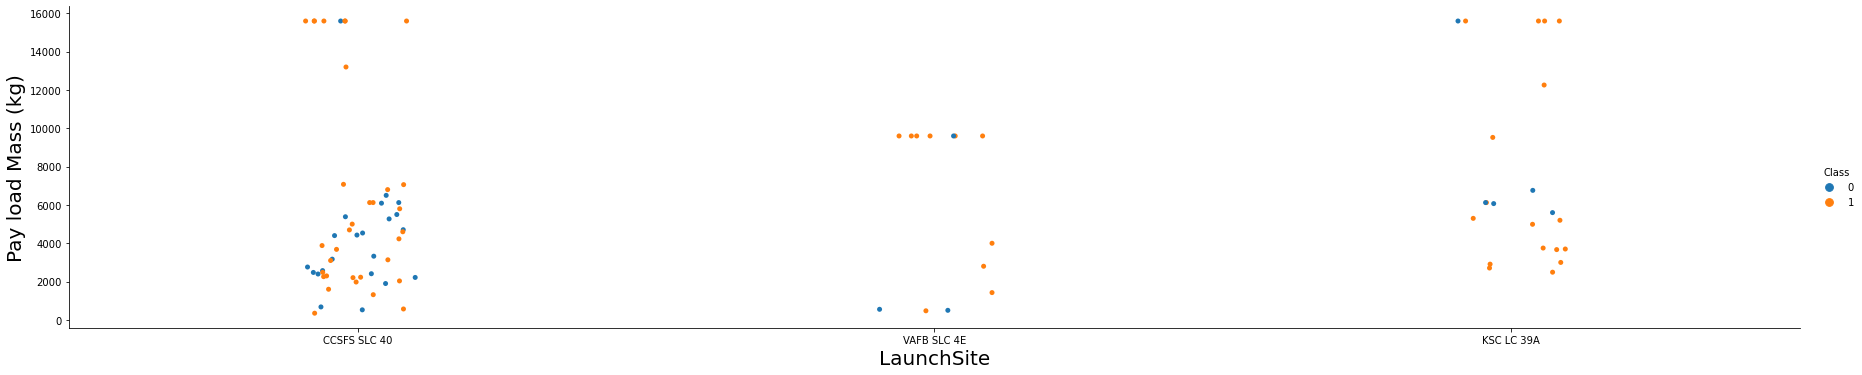

In [33]:
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

<h4><font color='green'>INSIGHN >> The greater the payload mass for Launch Site CCAFS SLC 40 the higher the success rate for the Rocket.<br>
There is not quite a clear pattern to be found using this visualization to make a decision if the Launch Site is dependant on Pay Load Mass for a success launch.
</font></h4>

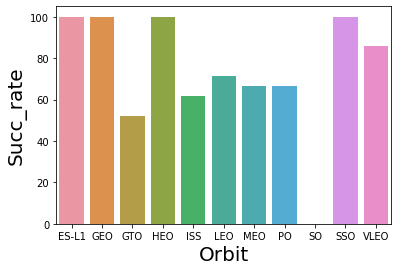

In [34]:
sns.barplot(x=succ_rate.index, y=succ_rate.values*100)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Succ_rate",fontsize=20)
plt.show()

A bar diagram makes it easy to compare sets of data between different groups at a glance.
The graph represents categories on one axis and a discrete value in the other. The goal is to show the relationship between the two axes. Bar charts can also show big changes in data over time!

<h4><font color='green'>INSIGHN >> Orbit GEO, HEO, SSO, ES-L1 has the best Success Rate</font></h4>

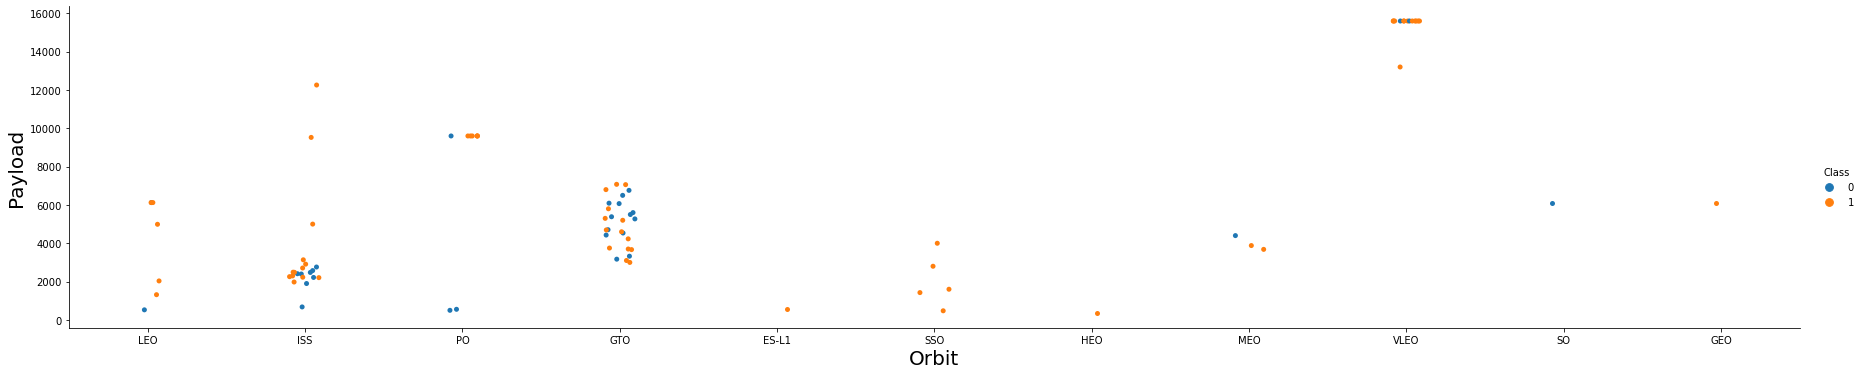

In [35]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="Orbit", y="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Payload",fontsize=20)
plt.show()

<h4><font color='green'>INSIGHN >> Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits.</font></h4>

In [36]:
df.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0005,-80.577366,28.561857,0


In [37]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,year
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0005,-80.577366,28.561857,0,2012


In [38]:
year_sr = df.groupby(df['year'])['Class'].mean()
year_sr = year_sr.to_frame().reset_index()

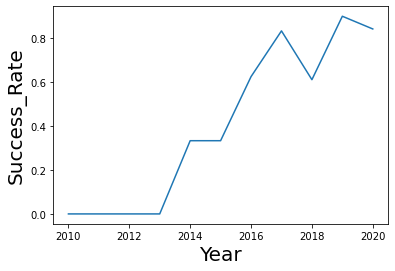

In [39]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.lineplot(data=year_sr, x=year_sr.year, y=year_sr.Class)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success_Rate",fontsize=20)
plt.show()

<h4><font color='green'>INSIGHN >> The sucess rate since 2013 kept increasing till 2020</font></h4>

### Plotly Dash Dashboard 

#### Graphs
* Pie Chart showing the total launches by a certain site/all sites 
* display relative proportions of multiple classes of data.size of the circle can be made proportional to the total quantity it represents.

#### Scatter Graph showing the relationship with Outcome and Payload Mass (Kg) for the different Booster Versions
* It shows the relationship between two variables.
* It is the best method to show you a non linear pattern.
* The range of data flow, i.e. maximum and minimum value, can be determined.
* Observation and reading are straightforward.

<figure>
<img src="theiadocker.png" alt="planimetria_1" style="width: 600px;"/>
</figure>

<figure>
<img src="pie chart all.png" alt="planimetria_1" style="width: 600px;"/>
</figure>

<h4><font color='green'>INSIGHN >> We can see that KSC LC39A had the most successful launches from all the sites</font></h4>

<figure>
<img src="pie chart ksc.png" alt="planimetria_1" style="width: 600px;"/>
</figure>

<h4><font color='green'>INSIGHN >> KSC LC39A launch site achieved a 76.9% success rate while getting a 23.1% failure rate</font></h4>

<figure>
<img src="payload vs outcome.png" alt="planimetria_1" style="width: 900px;"/>
</figure>

<h4><font color='green'>INSIGHN >> We can see the success rates for low weighted payloads is higher than the heavy weighted payloads</font></h4>

#### Feature selection

In [40]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head(2)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,6123.547647,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,6123.547647,1.0,0,B0005


In [41]:
# One hot technique to tranform from categorical to numerical values
features_one_hot = pd.get_dummies(features, prefix=['Orbits', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head(2)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbits_ES-L1,Orbits_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# increase of columns with one hot encoding
features.shape, features_one_hot.shape

((90, 12), (90, 81))

In [43]:
features_one_hot.dtypes

FlightNumber      int64
PayloadMass     float64
Flights           int64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056      uint8
Serial_B1058      uint8
Serial_B1059      uint8
Serial_B1060      uint8
Serial_B1062      uint8
Length: 81, dtype: object

In [44]:
# features casting
features_one_hot = features_one_hot.astype(dtype='float64')
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 81, dtype: object

#### Features and Labels

In [45]:
X = features_one_hot
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbits_ES-L1,Orbits_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [47]:
X.shape, y.shape

((90, 81), (90, 1))

In [48]:
X.to_numpy()
X[0:5]

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbits_ES-L1,Orbits_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
y.to_numpy()
y[0:5]

,Class
0,0
1,0
2,0
3,0
4,0


#### Standardization

In [50]:
# feature standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.71291154,  0.        , -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.67441914, -1.18972425, -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.63592675, -1.15742336, -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       ...,
       [ 1.63592675,  2.01380177,  3.49060516, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [ 1.67441914,  2.01380177,  1.00389436, ..., -0.21566555,
         5.38516481, -0.10599979],
       [ 1.71291154, -0.51905572, -0.65391284, ..., -0.21566555,
        -0.18569534,  9.43398113]])

#### Train Test splits

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72, 81), (18, 81), (72, 1), (18, 1))

<h4><font color='black'>Algorithms and hyperparameters to test</font></h4>
To not require a too high computational capacity and reduce process time, at this moment we prefer to not have too many hyperparameters to test

In [53]:
estimators = [(KNeighborsClassifier(), {'n_neighbors': list(np.arange((X.shape[0]*5)/100, 
                                                                      (X.shape[0]*10)/100,
                                                                      (X.shape[0]*20)/100, dtype=int))}),\
       
              (LogisticRegression(), {'C':[1e-3, 1e-2, 1e-1, 1]}),\
              
              (SVC(), {'C':[1e-3, 1e-2, 1e-1, 1],'gamma':[1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2]}),\
              
              (RandomForestClassifier(class_weight='balanced',n_jobs=-1, random_state=7),
                                           {'max_features':[1,2,3,4,5]})]

<h4><font color='black'>Nested cross validation with 10 folds</font></h4>
The purpose of nested cross validation is to find an unbiased estimate of the generalization error of your model

In [136]:
print(f'{bcolors.PERSONAL}Tested models\nNested cross vallidation in progress..{bcolors.ENDC}\n')

knn_model = []
knn_preds = []
knn_cv_score = 0

lr_model = []
lr_preds = []
lr_cv_score = 0

svc_rbf_model = []
svc_rbf_preds = []
svc_rbf_cv_score = 0

rf_model = []
rf_preds = []
rf_cv_score = 0

all_models_best_model = []
all_models_best_test_preds = []
all_models_best_score = 0                                
    
for model, params in estimators:
    
    # GridSearch to try every hyperparameters combination and select the best
    search = GridSearchCV(model, param_grid=params, cv=10, n_jobs=-1)
    
    # execute search
    search_fit = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = search_fit.best_estimator_
    # prediction on test set
    preds = best_model.predict(X_test)
    
    cv_score_mean = cross_val_score(search, X=X, y=y, cv=10, n_jobs=-1).mean()
    
    if 'KNeighborsClassifier' in str(model):
        if cv_score_mean>knn_cv_score:
            knn_model = best_model
            knn_preds = preds
            knn_cv_score = cv_score_mean
        
    elif 'LogisticRegression' in str(model):
        if cv_score_mean>lr_cv_score:
            lr_model = best_model
            lr_preds = preds
            lr_cv_score = cv_score_mean   
        
    elif 'SVC()' in str(model):
        if cv_score_mean>svc_rbf_cv_score:
            svc_rbf_model = best_model
            svc_rbf_preds = preds
            svc_rbf_cv_score = cv_score_mean  
        
    elif 'RandomForest' in str(model):
        if cv_score_mean>rf_cv_score:
            rf_model = best_model
            rf_preds = preds
            rf_cv_score = cv_score_mean

    if cv_score_mean>all_models_best_score:
        all_models_best_model = best_model
        all_models_best_test_preds = preds
        all_models_best_score = cv_score_mean


Tested models
Nested cross vallidation in progress..



<h3><font color='blue'>Predictive analysis results</font></h3>

In [153]:
print(f'>> {bcolors.PERSONAL}Knn{bcolors.ENDC}\nknn model: {knn_model}\n{bcolors.PERSONAL}knn cv_score: {knn_cv_score}{bcolors.ENDC}\nknn preds: {knn_preds[0:50]}\n\n')
print(f'>> {bcolors.PERSONAL}Logistic Regression{bcolors.ENDC}\nlr model: {lr_model}\n{bcolors.PERSONAL}lr cv_score: {lr_cv_score}{bcolors.ENDC}\nlr preds: {lr_preds[0:50]}\n\n')
print(f'>> {bcolors.PERSONAL}SVC_rbf kernel{bcolors.ENDC}\nsvc_rbf model: {svc_rbf_model}\n{bcolors.PERSONAL}svc_rbf cv_score: {svc_rbf_cv_score}{bcolors.ENDC}\nsvc_rbf preds: {svc_rbf_preds[0:50]}\n\n')
print(f'>> {bcolors.PERSONAL}Random Forest{bcolors.ENDC}\nrfmodel: {rf_model}\n{bcolors.PERSONAL}rf cv_score: {rf_cv_score}{bcolors.ENDC}\nrf preds: {rf_preds[0:50]}')


>> Knn
knn model: KNeighborsClassifier(n_neighbors=4)
knn cv_score: 0.788888888888889
knn preds: [1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1]


>> Logistic Regression
lr model: LogisticRegression(C=0.1)
lr cv_score: 0.8111111111111111
lr preds: [1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1]


>> SVC_rbf kernel
svc_rbf model: SVC(C=1, gamma=0.01)
svc_rbf cv_score: 0.8111111111111112
svc_rbf preds: [0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1]


>> Random Forest
rfmodel: RandomForestClassifier(class_weight='balanced', max_features=1, n_jobs=-1,
                       random_state=7)
rf cv_score: 0.7999999999999999
rf preds: [1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1]


<h3><font color='blue'>Results visualization</font></h3>

     Knn


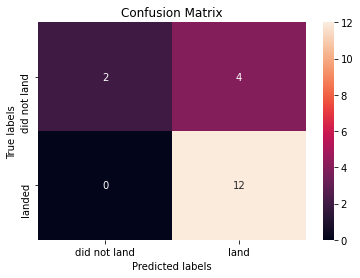

In [154]:
print(f'{bcolors.PERSONAL}     Knn{bcolors.ENDC}')
plot_confusion_matrix(y_test,knn_preds)

     Logistic Regression


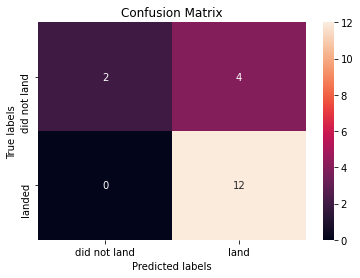

In [155]:
print(f'{bcolors.PERSONAL}     Logistic Regression{bcolors.ENDC}')
plot_confusion_matrix(y_test,knn_preds)

     SVC_rbf kernel


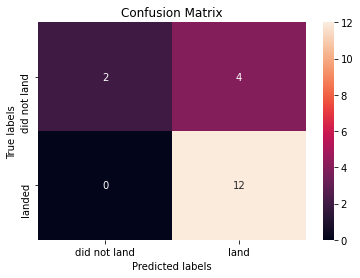

In [156]:
print(f'{bcolors.PERSONAL}     SVC_rbf kernel{bcolors.ENDC}')
plot_confusion_matrix(y_test,knn_preds)

     Random Forest


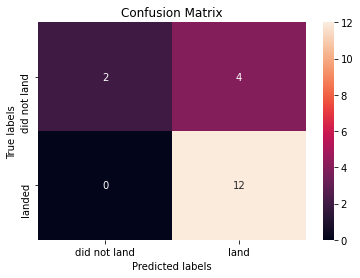

In [157]:
print(f'{bcolors.PERSONAL}     Random Forest{bcolors.ENDC}')
plot_confusion_matrix(y_test,knn_preds)

In [158]:
print(f"The best model for this dataset is: \n{bcolors.PERSONAL}{all_models_best_model}{bcolors.ENDC},\
      \n\nWith score: \n{bcolors.PERSONAL}{all_models_best_score}{bcolors.ENDC}")

The best model for this dataset is: 
SVC(C=1, gamma=0.01),      

With score: 
0.8111111111111112


In [159]:
print(f'{bcolors.PERSONAL}\nConfusion Matrix:\n{confusion_matrix(y_test,all_models_best_test_preds)}{bcolors.ENDC}')
print(f'{bcolors.PERSONAL}\n\nClassification report:\n{classification_report(y_test,all_models_best_test_preds)}{bcolors.ENDC}')


Confusion Matrix:
[[ 3  3]
 [ 1 11]]


Classification report:
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.79      0.92      0.85        12

    accuracy                           0.78        18
   macro avg       0.77      0.71      0.72        18
weighted avg       0.77      0.78      0.76        18



In [167]:
models_name = ['knn', 'lr', 'svc_rbf', 'rf', ]
models = [knn_model, lr_model, svc_rbf_model, rf_model]

In [161]:
ens_voting = VotingClassifier(estimators=[(models_name[0],models[0]), 
                                               (models_name[1],models[1]),
                                               (models_name[2],models[2]),
                                               (models_name[3],models[3])], voting='hard')
models.append(ens_voting)
models_name.append('ens_voting')

In [162]:
models

[KNeighborsClassifier(n_neighbors=4),
 LogisticRegression(C=0.1),
 SVC(C=1, gamma=0.01),
 RandomForestClassifier(class_weight='balanced', max_features=1, n_jobs=-1,
                        random_state=7),
 VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=4)),
                              ('lr', LogisticRegression(C=0.1)),
                              ('svc_rbf', SVC(C=1, gamma=0.01)),
                              ('rf',
                               RandomForestClassifier(class_weight='balanced',
                                                      max_features=1, n_jobs=-1,
                                                      random_state=7))])]

In [163]:
models_score = []
ens_voting_score = 0

for (model_name, model) in zip(models_name, models):
    ens_score = cross_val_score(model, X=X, y=y, cv=10, n_jobs=-1).mean()
    models_score.append(ens_score)
    if 'VotingClassifier' in str(model):    
            ens_voting_score = ens_score
            
    print(f'Model: {model_name}  Accuracy: {ens_score}%')
    

Model: knn  Accuracy: 0.788888888888889%
Model: lr  Accuracy: 0.8111111111111111%
Model: svc_rbf  Accuracy: 0.8111111111111112%
Model: rf  Accuracy: 0.8222222222222222%
Model: ens_voting  Accuracy: 0.7999999999999999%


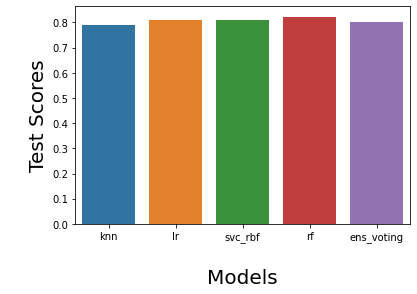

In [166]:
sns.barplot(x=models_name, y=models_score)
plt.xlabel("\nModels",fontsize=20)
plt.ylabel("\nTest Scores",fontsize=20)
plt.show()

     Random Forest


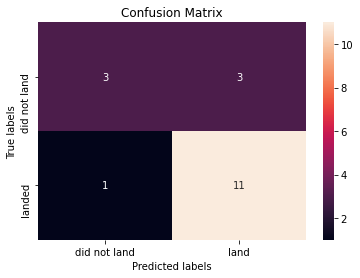

In [170]:
print(f'{bcolors.PERSONAL}     Random Forest{bcolors.ENDC}')
plot_confusion_matrix(y_test, all_models_best_test_preds)

In [169]:
best_model_score_final = np.max(models_score)
best_model_score_final_idx = np.argmax(models_score)
models_name_final = models_name[best_model_score_final_idx]

print(f"The best model for this dataset is: \n{bcolors.PERSONAL}{models_name_final}{bcolors.ENDC},\
      \n\nWith score: \n{bcolors.PERSONAL}{best_model_score_final}{bcolors.ENDC}")

The best model for this dataset is: 
rf,      

With score: 
0.8222222222222222


<figure>
<img src="winner.png" alt="models tested" style="width: 800px;"/>
</figure>

<h3><font color='blue'>Conclusions:</font></h3>

#### All launch sites are very close to the sea, and are fairly close to the equator. In fact the launches of space carriers exploit the sling effect due to the rotational motion of the earth which is precisely greater near the equator

#### Are launch sites in close proximity to coastline? Yes
#### Are launch sites in close proximity to railways? No
#### Are launch sites in close proximity to highways? No
#### Are launch sites in close proximity to cities? No
* The distance from "CCAFS LC-40 - Cape Canaveral Space Force Station" to the coast: 0.928 Km
* The distance from "CCAFS LC-40 - Cape Canaveral Space Force Station" to the railway: 1.300 Km
* The distance from "CCAFS LC-40 - Cape Canaveral Space Force Station" to the highway: 6.967 Km
* The distance from "CCAFS LC-40 - Cape Canaveral Space Force Station" to Melbourne: 51.928 Km

#### The orbits on which more launches are made are: "GTO", "ISS", "VLEO"
#### The first stage manages to land in 66% of the launches
#### With increasing launches and experience they can successfully carry heavier and heavier loads
#### The more amount of flights at a launch site the greater the success rate at a launch site.
#### The greater the payload mass for Launch Site CCAFS SLC 40 the higher the success rate for the Rocket.
#### There is not quite a clear pattern to be found using this visualization to make a decision if the Launch Site is dependant on Pay Load Mass for a success launch.
#### Orbit GEO, HEO, SSO, ES-L1 has the best Success Rate
#### Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits
#### The sucess rate since 2013 kept increasing till 2020
#### We can see that KSC LC39A had the most successful launches from all the sites
#### KSC LC39A launch site achieved a 76.9% success rate while getting a 23.1% failure rate
#### We can see the success rates for low weighted payloads is higher than the heavy weighted payloads

#### After selecting the best hyper-parameters for the 4 ML algorithms we achieved the same accuracy (83.33% ) on the test data for all models

#### We have 3 False Positive and 1 False Negative

<figure>
<img src="space_tks.png" alt="ip_image" style="width: 800px;"/>
</figure>